# Trade Generator

In [1]:
import pandas as pd
import numpy as np
from portfolio_optimization.portfolio.trade_generator import *
from portfolio_optimization.portfolio.cross_chain_trade import *

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

def read_debug_json(strategy="alpha"):
    # Read the debug.json file
    with open("/Users/arguiot/Downloads/response_1736188262337.json", "r") as f:
        data = json.load(f)

    # Get the debug data for the specified strategy
    debug_data = data["debug"][strategy]
    inputs = debug_data["inputs"]
    asset_list = debug_data["asset_list"]
    chain_list = debug_data["chain_list"]

    # Extract inputs in the correct format
    inputs = {
        "n_assets": inputs["n_assets"],
        "n_networks": inputs["n_networks"],
        "alphas": np.array(inputs["alphas"], dtype=float),
        "target_weights": np.array(inputs["target_weights"], dtype=float),
        "wealth_value": np.array(inputs["wealth_value"], dtype=float),
        "chis": np.array(inputs["chis"], dtype=float),
        "projected_portfolio_values": np.array(
            inputs["projected_portfolio_values"], dtype=float
        ),
        "external_movements": np.array(inputs["external_movements"], dtype=float),
        "priority_queue": np.array(inputs["priority_queue"], dtype=int),
        "beta_in": inputs["beta_in"],
        "beta_out": inputs["beta_out"],
        "asset_list": asset_list,
        "chain_list": chain_list
    }

    return inputs, data["generated_trades"][strategy]

# Example usage:
inputs, trades = read_debug_json("alpha")  # or 'beta' or 'gamma'

# Call the function with the extracted inputs
(
    status,
    optimal_wealth_value,
    optimal_bridges,
    output_weights,
    output_weights_min,
    output_weights_max,
) = optimal_wealth_trades_complete(
    n_assets=inputs["n_assets"],
    n_networks=inputs["n_networks"],
    alphas=inputs["alphas"],
    target_weights=inputs["target_weights"],
    wealth_value=inputs["wealth_value"],
    chis=inputs["chis"],
    projected_portfolio_values=inputs["projected_portfolio_values"],
    external_movements=inputs["external_movements"],
    priority_queue=inputs["priority_queue"],
    beta_in=inputs["beta_in"],
    beta_out=inputs["beta_out"],
)

# Print the Chis as a table, with asset name as column headers, using pandas
chis_df = pd.DataFrame(inputs["chis"], columns=inputs["asset_list"])

     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan
     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan
     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan
     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan
     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan
     pcost       dcost       gap    pres   dres
 0:      nan      nan  nan    nan    nan


/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/cross_chain_trade.py:239: RuntimeWarning: invalid value encountered in divide
  chis
/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/portfolio/cross_chain_trade.py:88: RuntimeWarning: invalid value encountered in divide
  chis


In [5]:
chis_df.T

,0,1,2
avax,0.0,1.0,1.0
bnb,1.0,1.0,0.0
btcb,0.0,1.0,0.0
eth,1.0,1.0,0.0
ftm,1.0,1.0,0.0
inj,1.0,1.0,0.0
kas,1.0,1.0,1.0
link,1.0,1.0,1.0
matic,0.0,0.0,1.0
mkr,1.0,1.0,1.0


/var/folders/d2/1qh2h9ys19z3375prb_0cb8w0000gn/T/ipykernel_67983/934313934.py:41: RuntimeWarning: invalid value encountered in divide
  np.abs(output_weights - inputs["target_weights"]) / inputs["target_weights"]



Status: Failed

Projected Portfolio Values: [14230.56788932 23231.07457555 12419.75223042]

External Movements: [0. 0. 0.]

Optimal Bridges: [nan nan nan]

Trade Analysis:

Chain: bsc
avax: 11.1111
bnb: -0.9290
btcb: 0.0462
eth: 0.3338
ftm: 127.2146
inj: -16.4175
kas: 1836.5119
link: 36.5393
mkr: 0.0216
near: -2.1874
pendle: 47.0631
sol: -0.9779
ton: -29.8513

Chain: pol
avax: -15.9776
kas: -5486.5555
link: 27.6205
matic: -10.5180
mkr: -0.2497
rndr: -47.5997
sol: -2.8475
wbtc: -0.0329
weth: -0.4630

Chain: eth
bnb: 0.8887
eth: 0.2016
ftm: -92.4332
inj: 18.1182
kas: 3855.9192
link: -70.9919
mkr: 0.3452
ondo: -28.9738
rndr: 30.4279
sol: 2.6570
ton: 42.0826
wbtc: -0.0138

Relative Deviations:
avax: 0.00%
bnb: 0.00%
btcb: 0.00%
eth: 0.00%
ftm: 0.00%
inj: 0.00%
kas: 0.00%
link: 0.00%
mkr: 0.00%
near: 0.00%
ondo: 0.00%
pendle: 0.00%
rndr: 0.00%
sol: 0.00%
ton: 0.00%


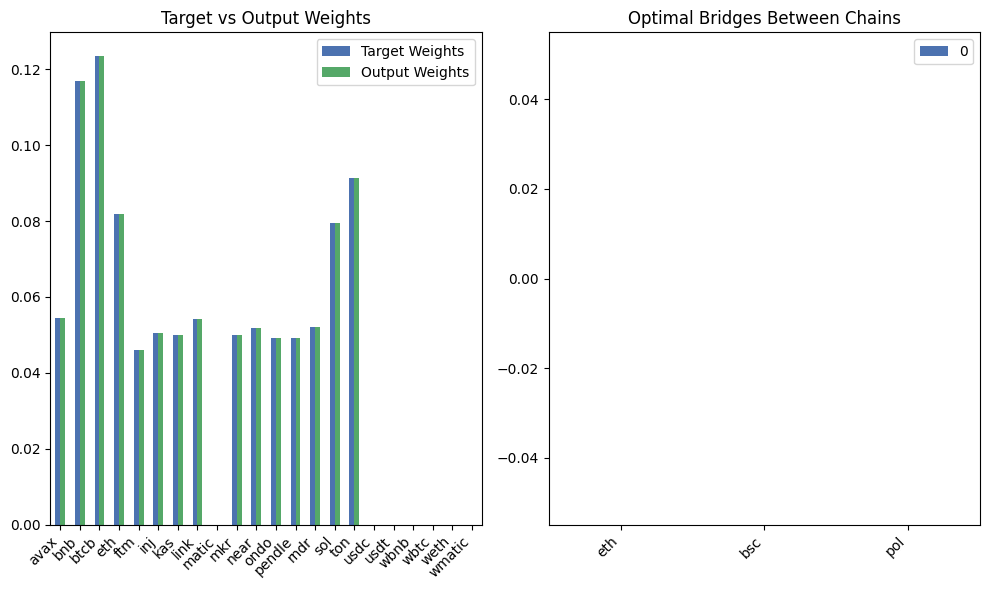

In [4]:
# Create visualization of the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot 1: Compare target weights vs output weights
weights_df = pd.DataFrame(
    {
        "Target Weights": inputs["target_weights"],
        "Output Weights": output_weights,
    },
    index=inputs["asset_list"],
)

weights_df.plot(kind="bar", ax=ax1)
ax1.set_title("Target vs Output Weights")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Plot 2: Optimal bridges between chains
bridges_df = pd.DataFrame(optimal_bridges, index=inputs["chain_list"])
bridges_df.plot(kind="bar", ax=ax2)
ax2.set_title("Optimal Bridges Between Chains")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()

# Print detailed analysis
print("\nStatus:", "Success" if status else "Failed")
print("\nProjected Portfolio Values:", inputs["projected_portfolio_values"])
print("\nExternal Movements:", inputs["external_movements"])
print("\nOptimal Bridges:", optimal_bridges)

# Compare generated trades with optimal wealth value
print("\nTrade Analysis:")
for chain in trades:
    print(f"\nChain: {chain}")
    for asset, details in trades[chain].items():
        size = float(details["size"])
        print(f"{asset}: {size:.4f}")

# Calculate and display relative deviations
relative_dev = (
    np.abs(output_weights - inputs["target_weights"]) / inputs["target_weights"]
)
print("\nRelative Deviations:")
for asset, dev in zip(inputs["asset_list"], relative_dev):
    if not np.isnan(dev):
        print(f"{asset}: {dev:.2%}")